In [483]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import PolynomialFeatures

In [484]:
def get_data_noisysine():
    data = pd.read_csv("datasets/noisysine.csv").values
    points=[]
    for d in data[:, 0] :
        points.append(np.array([d]))
    return np.array(points), data[:, 1]

def get_data_hydrodynamics():
    data = pd.read_csv("datasets/noisysine.csv").values
    points=[]
    for d in data[:, 0:-1] :
        print(d)
        points.append(np.array(d))
    return np.array(points), data[:, -1]


def split_data(points, labels):
    points_train, points_test, labels_train, labels_test = train_test_split(points, labels, train_size=0.8)  
    return points_train, labels_train, points_test,  labels_test

In [485]:
def inv(x, y):
    return np.linalg.inv(np.transpose(x) @ x) @ np.transpose(x) @ y

def h(w, x, degree):
    return PolynomialFeatures(degree=degree).fit_transform(x) @ w
    
def polynomial_regression(points_train, labels_train, points_test,  labels_test,degree):
    points_train_f = PolynomialFeatures(degree=degree).fit_transform(points_train)
    w = inv(points_train_f, labels_train)
    labels_test_n = h(w, points_test, degree)
    score  = 1 - (np.sum((labels_test_n - labels_test) ** 2)) / (np.sum((labels_test - np.mean(labels_test)) ** 2))
    return w, score

In [486]:
def plot(points, labels, w, degree):
    matplotlib.rcParams['figure.figsize'] = [5, 5]
    points_min = points.min() - 1
    points_max = points.max() + 1
    points_n = np.arange(points_min, points_max, 0.02).reshape(-1, 1)
    labels_n = PolynomialFeatures(degree=degree).fit_transform(points_n) @ w
    plt.scatter(points, labels)
    plt.plot(points_n, labels_n, color='blue')
    plt.xticks(())
    plt.yticks(())
    plt.show()

1: 0.1298670610253404


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


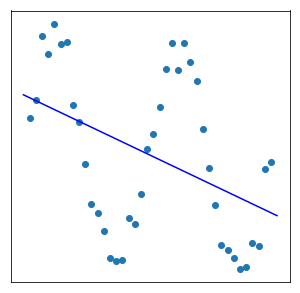

2: 0.1109970986696015


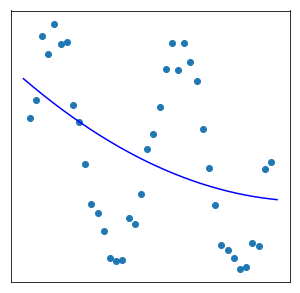

3: 0.2767358651412608


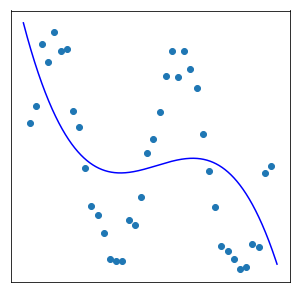

4: 0.3087266463768277


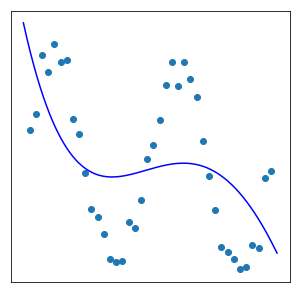

5: 0.9100237464635031


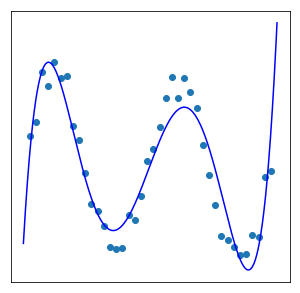

In [487]:
points, labels = get_data_noisysine()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
for d in [1, 2,3 , 4, 5]:
    w, score= polynomial_regression(points_train, labels_train, points_test,  labels_test, d)
    print(str(d) + ": " + str(score))
    plot(points, labels, w, d)

In [488]:
def read_hydrodynamics():
    D = []
    
    with open('./Datasets/hydrodynamics.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            D.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(D)

def extract_labels(D):
    X = np.array([row[0] for row in D])
    Y = np.array([row[1] for row in D])
    
    return X, Y

def plot_regression(D, h, title):
    X, Y = extract_labels(D)
    x_min, x_max = X.min() - 1, X.max() + 1
    X_h = np.arange(x_min, x_max, 0.02).reshape(-1, 1)
    Y_h = h(X_h)
    
    plt.scatter(X, Y, color='blue')
    plt.plot(X_h, Y_h, color='red')

    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

In [489]:
def r2(X, Y, h):
    Y_h = h(X)
    u = np.sum((Y_h - Y) ** 2)
    v = np.sum((Y - np.mean(Y)) ** 2)
    r = 1 - u / v
    
    return r

def read_hydrodynamics():
    D = []
    
    with open('./Datasets/hydrodynamics.csv', newline='') as csv_file:
        dataset_reader = csv.reader(csv_file, delimiter=',')
        next(dataset_reader)
        for row in dataset_reader:
            row = list(map(float, row))
            D.append(np.array([np.array(row[:-1]), row[-1]]))

    return np.array(D)

def extract_labels(D):
    X = np.array([row[0] for row in D])
    Y = np.array([row[1] for row in D])
    
    return X, Y


from sklearn.model_selection import train_test_split

def split_dataset(D, train_size):
    X, Y = extract_labels(D)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, test_size=1 - train_size)
    D_train = np.array([[x_row, y_row] for x_row, y_row in zip(X_train, Y_train)])
    D_test = np.array([[x_row, y_row] for x_row, y_row in zip(X_test, Y_test)])
    
    return D_train, D_test


def polynomial_regressionV(D, degree):
    D_train, D_val = split_dataset(D, 0.8)
    X_train, Y_train = extract_labels(D_train)
    X_train_extended = PolynomialFeatures(degree=degree).fit_transform(X_train)
    X_val, Y_val = extract_labels(D_val)
    print(X_train)
    w = inv(X_train_extended, Y_train)
    labels_test_n = h(w, X_val, degree)
    score  = 1 - (np.sum((labels_test_n - Y_val) ** 2)) / (np.sum((Y_val - np.mean(Y_val)) ** 2))
    return w, score

In [490]:
D = read_hydrodynamics()
degrees = np.array([1, 2, 4])

for degree in degrees:
    h12, score = polynomial_regressionV(D, degree)
    print('Dataset: hydrodynamics Degree: %d Score on validation: %f' % (degree, score))


[[-2.3    0.53   4.76   3.68   3.16   0.425]
 [-2.3    0.562  5.14   4.95   3.17   0.125]
 [ 0.     0.565  5.1    3.94   3.51   0.3  ]
 ...
 [ 0.     0.565  5.1    3.94   3.51   0.45 ]
 [ 0.     0.565  4.77   3.99   3.15   0.175]
 [ 0.     0.565  4.77   3.99   3.15   0.4  ]]
Dataset: hydrodynamics Degree: 1 Score on validation: 0.729351
[[-5.     0.53   4.78   3.75   3.15   0.45 ]
 [-2.3    0.565  4.78   5.35   2.76   0.325]
 [ 0.     0.6    4.78   4.24   3.15   0.225]
 ...
 [-2.3    0.53   4.76   3.68   3.16   0.35 ]
 [ 0.     0.565  4.77   3.99   3.15   0.3  ]
 [-2.4    0.585  4.78   3.84   3.32   0.35 ]]
Dataset: hydrodynamics Degree: 2 Score on validation: 0.928159
[[-2.4    0.568  4.34   2.98   3.15   0.35 ]
 [-2.3    0.6    4.34   4.23   2.73   0.375]
 [ 0.     0.53   4.78   3.75   3.15   0.175]
 ...
 [-2.3    0.565  4.78   5.35   2.76   0.175]
 [ 0.     0.565  5.1    3.94   3.51   0.45 ]
 [-2.3    0.53   4.34   2.81   3.15   0.325]]
Dataset: hydrodynamics Degree: 4 Score on vali

In [492]:
points, labels = get_data_hydrodynamics()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
print(points_train)
for d in [1, 2]:
    w, score= polynomial_regression(points_train, labels_train, points_test,  labels_test, d)
    print(str(d) + ": " + str(score))



[[39.]
 [20.]
 [12.]
 [ 0.]
 [37.]
 [16.]
 [26.]
 [ 5.]
 [32.]
 [15.]
 [38.]
 [ 9.]
 [ 1.]
 [33.]
 [22.]
 [18.]
 [31.]
 [11.]
 [24.]
 [35.]
 [28.]
 [30.]
 [ 6.]
 [ 7.]
 [17.]
 [34.]
 [13.]
 [23.]
 [ 8.]
 [27.]
 [21.]
 [25.]]
1: 0.34336945773376404
2: 0.2757161930500249


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
